Задача апроксимации (наиболее точного приближения) функции 
$ y = \sin(x) $ 
с использованием многочлена третьей степени 
$ \hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 = \langle(1, x, x^2, x^3)\,,\mathbf{\theta}\rangle  $, где $\theta = (\theta_0, \theta_1, \theta_2, \theta_3)^\mathrm{T} $
при имееющимся массиве  данных вида $\{x_i,y_i=\sin(x_i)\}_{i=1,n} $ может быть формализована следующим образом:<br>
нахождение таких параметров $\theta$ , которые минимизирровали бы  
$$loss = J(\theta) = \displaystyle\sum_{i=1}^{n} [ y_i-\hat{y}(x_i,\theta) ]^2 $$ 

In [1]:
import numpy as np
import math
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, suppress=True)

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

print("x[0:5]= \n%s\n" % x[:5])
print("y[0:5]= \n%s\n" % y[:5])

x[0:5]= 
[-3.14159 -3.13845 -3.13531 -3.13216 -3.12902]

y[0:5]= 
[-0.      -0.00314 -0.00629 -0.00943 -0.01257]



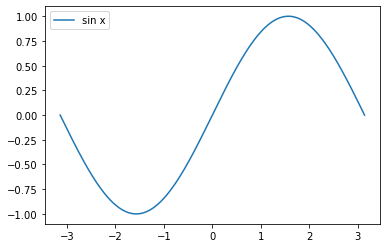

In [2]:
#plot function
plt.plot(x, y)
plt.legend(['sin x'], loc='upper left')
plt.show()

Градиентный спуск
$$ \theta_{k+1} \leftarrow \theta_{k} + \alpha \nabla \theta{J}$$
$$ \nabla_\theta{J} = ( \frac{dJ}{d\theta_0}, \frac{dJ}{d\theta_1}, \frac{dJ}{d\theta_2}, \frac{dJ}{d\theta_3})  $$

### Использование механизма Autograd

In [3]:
import torch
dtype = torch.float64
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

In [4]:
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

$$  y = a + b x + c x^2 + d x^3 $$

In [5]:
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

FORWARD

In [6]:
# Forward pass: compute predicted y using operations on Tensors.
y_pred = a + b * x_tensor + c * x_tensor ** 2 + d * x_tensor ** 3
print("y_pred[0:5]= \n%s\n" %  y_pred[:5])

y_pred[0:5]= 
tensor([36.6897, 36.5692, 36.4490, 36.3290, 36.2092], dtype=torch.float64,
       grad_fn=<SliceBackward>)



BACKWARD

In [7]:
# Compute and print loss using operations on Tensors.
# Now loss is a Tensor of shape (1,)
# loss.item() gets the scalar value held in the loss.
loss = (y_pred - y_tensor).pow(2).sum()
# Use autograd to compute the backward pass. This call will compute the
# gradient of loss with respect to all Tensors with requires_grad=True.
# After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
# the gradient of the loss with respect to a, b, c, d respectively.
loss.backward()

The gradients are now stored in `.grad` of those variables that require them.

In [8]:
print("dJ/da = \n", a.grad)
print("dJ/db = \n", b.grad)

dJ/da = 
 tensor(-9229.4291, dtype=torch.float64)
dJ/db = 
 tensor(-108157.3641, dtype=torch.float64)


In [9]:
learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x_tensor + c * x_tensor ** 2 + d * x_tensor ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y_tensor).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 125.75774778531817
199 91.29052957836186
299 66.9949347803502
399 49.86467610953723
499 37.783784184726855
599 29.26207061485855
699 23.249749170878577
799 19.007076341136994
899 16.012647226374575
999 13.89886132367146
1099 12.406493048223735
1199 11.352701033175963
1299 10.608494028509382
1399 10.0828534857839
1499 9.711543421969736
1599 9.449221814251473
1699 9.263878126335072
1799 9.132910179697987
1899 9.040356649610757
1999 8.974944391729032
Result: y = -0.013197248361950756 + 0.8552576754435598 x + 0.0022767449455971455 x^2 + -0.09311942136073675 x^3


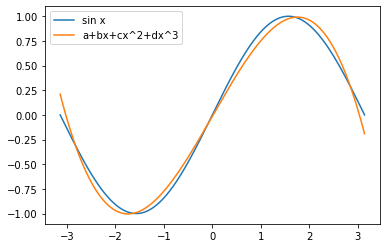

In [10]:
a = a.item()
b = b.item()
c = c.item()
d = d.item()

y_pred = a + b * x + c * x ** 2 + d * x ** 3


plt.plot(x, y)
plt.plot(x, y_pred)

plt.legend(['sin x', 'a+bx+cx^2+dx^3'], loc='upper left')

plt.show()

### Модуль nn

In [11]:
# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x_tensor.unsqueeze(-1).pow(p)
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]], dtype=torch.float64)

In [19]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).double()

In [20]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [21]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [22]:
for t in range(2000):
    
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_tensor)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 18633.05174589813
199 7795.381249380785
299 3318.888986154297
399 1832.9218536282299
499 1471.289761152104
599 1295.3130559811289
699 1110.1415682866066
799 924.9668845595311
899 753.670040354779
999 600.9950032439162
1099 467.6634559358981
1199 353.40925424669257
1299 257.5899030993117
1399 179.41891967601657
1499 118.00594028965524
1599 72.3506706028674
1699 41.008227034106156
1799 22.003259701652155
1899 12.659320940339482
1999 9.473696928431181


In [23]:
linear_layer = model[0]
a = linear_layer.bias.item()
b = linear_layer.weight[:, 0].item()
c = linear_layer.weight[:, 1].item()
d = linear_layer.weight[:, 2].item()
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

Result: y = -0.0005753901129252858 + 0.8329014786854677 x + -0.0005758541319598545 x^2 + -0.08966209120626298 x^3


### Еще один способ задания модели

In [24]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'